# Capstone Project: Predicting Fraudulent Transactions Using Machine Learning - Modeling

### Author: Tolulope Oludemi

### Date: August 8, 2022


---
**Notebook: Fitting Different Models on Dataset**

In this notebook, I loaded the pre-processed, model ready dataset and fitted it on the following models:
- Decision Tree
- KNN
- Logistic Regression
- Random Forest
- XGBoost
- Neural Network

The goal of this, is to identify the best performing model. The chosen model will then be optimized to see if an even better performance can be observed.

---


# Table of Contents

---

[I. Process To Getting Here](#Process-to-Getting-Here) <br>

[II. Import Libraries and Dataset](#Import-Libraries-and-Dataset)<br>

[III. Checking Dataset](#Checking-Dataset)<br>

[IV. Train-Test Split](#Train-Test-Split)<br>

[V. Fitting the Models](#Fitting-the-Models)<br>
- [Decision Tree](#1.-Decision-Tree)<br>
- [KNN](#2.-KNN)<br>
- [Logistic Regression](#3.-Logistic-Regression)<br>

[VI. Ensemble Models](#Ensemble-Models)<br>
- [Random Forest](#Random-Forest)<br>
- [XGBoost](#XGBoost)<br>

[VII. Comparison of Base Models](#Comparison-of-Base-Models)<br>

[VIII. Neural Networks](#Neural-Networks)<br>

[IX. Comparison of All Models](#Comparison-of-All-Models)<br>

[X. Optimizing XGBoost for Better Results](#Optimizing-XGBoost-for-Better-Results)<br>
- [Downsampling](#Downsampling)<br>
- [Upsampling](#Upsampling)<br>

[XI. Comparison of XGBoost Models](#Comparison-of-XGBoost-Models)<br>
- [Optimizing the Parameters of the Best Performing XGBoost Model](#Optimizing-the-Parameters-of-the-Best-Performing-XGBoost-Model)<br>

[XII. Final Models](#Final-Models---Scoring-on-Test-Set-for-Comparison)<br>
- [KNN](#KNN)<br>
- [Decision Tree](#Decision-Tree)<br>
- [Logistic Regression](#Logistic-Regression)<br>
- [Random Forest](#Random-Forest)<br>
- [XGBoost](#XGBoost)<br>
    - [Original Class Distribution](#Original-Class-Distribution)<br>
    - [Downsampled](#Downsampled-Data)<br>
    - [Upsampled (Original)](#Upsampled-Data-(Original))<br>
    - [Optimized Parameters for XGBoost](#Optimized-Parameters-for-XGBoost)<br>

[XIII. Comparison of Models on Test Set Vs. Validation Set](#Comparison-of-Models-on-Test-Set-VS-Models-on-Validation-Set)<br>

[XIV. Summary of Notebook](#Summary)<br>

# Process to Getting Here

Initially, in a separare notebook, I started fitting each model using GridSearchCV to find the best parameters for each model, specifically KNN and Logistic Regression. 

My approach was to fit a KNN model on the original class distribution, upsampled data and downsampled data model using GridSearchCV, with the same approach as Logistic Regression (original class distribution, upsampled data, and downsampled data). 

This process was taking too long due to the constant need to check for the best parameters for each model. I decided to use the default parameters and fit as many models as I can, then optimize the best performing model to see if I could get better results.

This notebook will use the default parameters on the models listed above and the best performing model will then be optimized.

# Import Libraries and Dataset

In [1]:
# import necessary libraries

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Using GoogleColab so I need to set a path for where the data is located
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cc_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/model_ready_dataset.csv", index_col=0)

cc_df.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,...,job_transform__x0_Surveyor,job_transform__x0_Teacher,job_transform__x0_Television production assistant,job_transform__x0_Television/film/video producer,job_transform__x0_Therapist,job_transform__x0_Trading standards officer,job_transform__x0_Transport planner,job_transform__x0_Tree surgeon,job_transform__x0_Veterinary surgeon,job_transform__x0_Warehouse manager
5,4767265376804500,94.63,18917,40.3750,-75.2045,2158,1325376248,40.653382,-76.152667,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,6011360759745864,71.65,22824,38.8432,-78.6003,6018,1325376308,38.948089,-78.540296,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,180042946491150,71.22,33710,27.7898,-82.7243,341043,1325376416,27.630593,-82.308891,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,3514865930894695,7.77,88325,32.9396,-105.8189,899,1325376543,32.863258,-106.520205,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,6011999606625827,3.26,7640,40.9918,-73.9800,4664,1325376560,41.831174,-74.335559,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Checking Dataset



In [4]:
# Double check the number of rows and columns
cc_df.shape

(128802, 783)

In [5]:
# Make sure the data types are numeric before fitting a model
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128802 entries, 5 to 1296642
Columns: 783 entries, cc_num to job_transform__x0_Warehouse manager
dtypes: float64(773), int64(10)
memory usage: 770.4 MB


In [6]:
#Checking to make sure there are no NaNs in the dataset
cc_df.isna().sum().sum()

0

In [7]:
# Checking to make sure there are no duplicated rows in the dataset
cc_df.duplicated().sum()

0

# Train-Test Split

In [8]:
# Defined Independent and dependent variables

X = cc_df.drop('is_fraud', axis=1)
y = cc_df['is_fraud']

In [9]:
# Checked the shape of the independent and dependent variables

print(X.shape, y.shape)

(128802, 782) (128802,)


In [10]:
# To see the distribution of non-fraudulent and fraudulent transactions
y.value_counts()

0    126142
1      2660
Name: is_fraud, dtype: int64

There are 126,142 cases of non-fraudulent transactions and 2,660 cases of non-fraudulent transactions in the dataset.

---

When conducting a train, validation, and test set, I stratified on the dependent variable (target) to keep the class distribution the same throughout the sets.

In [11]:
# Split the data into test and remainder (for train and val sets) sets
# The test set will be 20% of the entire dataset

from sklearn.model_selection import train_test_split

X_remainder, X_test, y_remainder, y_test = train_test_split(X, 
                                                            y, 
                                                            test_size = 0.2,
                                                            random_state=1,
                                                           stratify=y)

In [12]:
# Split the remainder set into train and validagtion sets
# The validation set will be 30% of the remainder set

X_train, X_val, y_train, y_val = train_test_split(X_remainder, 
                                                  y_remainder,
                                                  test_size = 0.3,
                                                  random_state=1,
                                                  stratify=y_remainder)

In [13]:
# Print the shape of each set (test, validation, and train)

print(f'Shape of test set: {X_test.shape}')
print(f'Shape of validation set: {X_val.shape}')
print(f'Shape of train set: {X_train.shape}')

Shape of test set: (25761, 782)
Shape of validation set: (30913, 782)
Shape of train set: (72128, 782)


In [14]:
# Observe the class distribution of each set

print(f'Fraud value counts in test set:\n{y_test.value_counts()}')
print(f'\nFraud value counts in validation set:\n{y_val.value_counts()}')
print(f'\nFraud value counts in train set:\n{y_train.value_counts()}')

Fraud value counts in test set:
0    25229
1      532
Name: is_fraud, dtype: int64

Fraud value counts in validation set:
0    30275
1      638
Name: is_fraud, dtype: int64

Fraud value counts in train set:
0    70638
1     1490
Name: is_fraud, dtype: int64


The class distribution throughout the train, validation, and test set are the same. The next step is to fit the models on the train set, and score/predict on the validation set.

# Fitting the Models

The evaluation metrics that will be used to evaluate the performance of the models is the recall score, f1-score and the AUC score. 

My goal is to identify as many fraudulent transactions as possible, without misclassifying too many non-fraudulent transactions as fraudulent, so a good f1-score as well. 

These metrics will determine the best performing model.

## 1. Decision Tree

In [15]:
# import the model from sklearn
from sklearn.tree import DecisionTreeClassifier

# instantiate and fit the model on the train set
DT_model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)

# score the train and validation set
print(f"Train accuracy: {DT_model.score(X_train, y_train)}")
print(f"Validation accuracy: {DT_model.score(X_val, y_val)}")

Train accuracy: 1.0
Validation accuracy: 0.998059069000097


The scores on the train and validation set looks good, it doesn't appear to be overfitting. Due to the extreme class imbalance in the dataset, I can't assume that the accuracy score alone is a good evaluation metric of how well my model performed.

---
Next, I looked at the classification report to see the precision, recall, and f1 score for both classes

In [16]:
from sklearn.metrics import classification_report

y_pred = DT_model.predict(X_val)

report_initial = classification_report(y_val, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30275
           1       0.96      0.95      0.95       638

    accuracy                           1.00     30913
   macro avg       0.98      0.97      0.98     30913
weighted avg       1.00      1.00      1.00     30913



This is a pretty good model! The model is 96% precise in predicting fraud, and able to recall 95% fraudulent instances, with a solid f1 score. Next, I displayed and plotted the confusion matrix, to see exactly how many instances the model was able to predict and how accurate the predictions were.

In [17]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# display the class distribution to see the totals for each class
display(y_val.value_counts())

# display confusion matrix
con_matrix = pd.DataFrame(
    data = confusion_matrix(y_val, y_pred),
    index = ['True Non-fraudulent', 'True Fraudulent'],
    columns = ['Predicted Non-fraudulent', 'Predicted Fraudulent']
)
display(con_matrix)

0    30275
1      638
Name: is_fraud, dtype: int64

,Predicted Non-fraudulent,Predicted Fraudulent
True Non-fraudulent,30249,26
True Fraudulent,34,604


Out of 638 fraudulent transactions, the model was able to accurately predict 604 cases. The model missed 34 fraudulent transactions, and predicted those transactions as non-fraudulent.

The model was also able to predict 30,249 non-fraudulent transactions as non-fraudulent, but misclassified 26 non-fraudulent transactions as fraudulent. But overall, this is a good model.

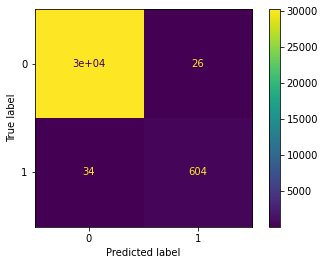

In [18]:
# plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(DT_model, X_val, y_val);

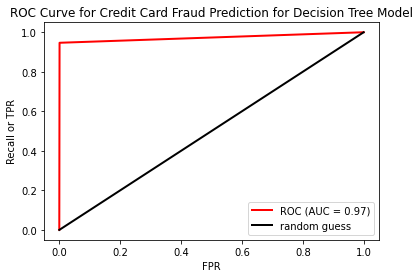

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

# probabilistic prediction
y_val_proba = DT_model.predict_proba(X_val)[:,1]

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_val, y_val_proba)

# AUC
roc_auc = roc_auc_score(y_val, y_val_proba)

# plot
plt.figure()
sns.lineplot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
sns.lineplot([0, 1], [0, 1], color='black', lw=2, label='random guess') # random guess
plt.xlabel('FPR')
plt.ylabel('Recall or TPR')
plt.title('ROC Curve for Credit Card Fraud Prediction for Decision Tree Model')
plt.legend(loc='best')
plt.show()

The ROC for this model has a good AUC score too, with an AUC score of 97%, meaning that the model does a good job of distinguishing between the positive and negative classes.

## 2. KNN

In [20]:
# import the model from sklearn and standardscaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# instantiate the scaler
scaler = StandardScaler().fit(X_train)

# transform the train and validation set
X_train_ss = scaler.transform(X_train)
X_val_ss = scaler.transform(X_val)

In [21]:
# instantiate the KNN model and fit it on the scaled data

KNN_model = KNeighborsClassifier().fit(X_train_ss, y_train)


# print out the train and validation scores
print(f"Number of Neighbors: {KNN_model.n_neighbors}")
print(f"Train accuracy: {KNN_model.score(X_train_ss, y_train)}")
print(f"Validation accuracy: {KNN_model.score(X_val_ss, y_val)}")

Number of Neighbors: 5
Train accuracy: 0.9835292812777284
Validation accuracy: 0.9826933652508654


The train and validation accuracies are really good! But it is not a good evaluation metric for this imbalanced data. I will look at the classification report to see if the model was able to accuractely detect the fraudulent transactions.

In [22]:
# classification report
y_pred = KNN_model.predict(X_val_ss)

report_initial = classification_report(y_val, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     30275
           1       0.95      0.17      0.29       638

    accuracy                           0.98     30913
   macro avg       0.97      0.59      0.64     30913
weighted avg       0.98      0.98      0.98     30913



Although the train and validation accuracies were really good, the model only has a 17% recall score, meaning that it was only able to correctly identify 17% of the total fraudulent transactions.

The precision is 95% meaning that out of the 17% correctly identified, the model is 95% confident in its precision of identifying fraudulent transactions.

The harmonic mean (F1 score) is only 29% despite the precision being high at 95%. Meaning that the balance between the precision and recall is very low.

Next, I will get the confusion matrix to see exactly how many non-fraudulent and fraudulent transactions the model was able to predict correctly and incorrectly.

In [23]:
# display the number of fraudulent and non-fraudulent transactions
display(y_val.value_counts())

# confusion matrix
con_matrix = pd.DataFrame(
    data = confusion_matrix(y_val, y_pred),
    index = ['True Non-fraudulent', 'True Fraudulent'],
    columns = ['Predicted Non-fraudulent', 'Predicted Fraudulent']
)
display(con_matrix)

0    30275
1      638
Name: is_fraud, dtype: int64

,Predicted Non-fraudulent,Predicted Fraudulent
True Non-fraudulent,30269,6
True Fraudulent,529,109


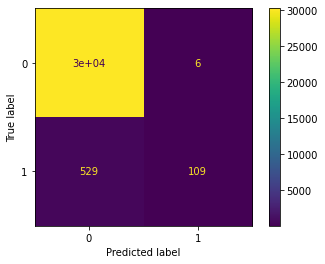

In [24]:
plot_confusion_matrix(KNN_model, X_val_ss, y_val);

Here, the model accurately classified 30,269 non-fraudulent transactions out of 30,275 non-fraudulent transactions. The model misclassified 6 non-fraudulent transactions as fraudulent.

The model accurately classified 109 fraudulent transactions out of 638 fraudulent transactions, and misclassified 529 fraudulent transactions as non-fraudulent.

Based on the classification report, the Decision Tree is a better model than KNN.

Next, I will plot the ROC curve for the KNN model.

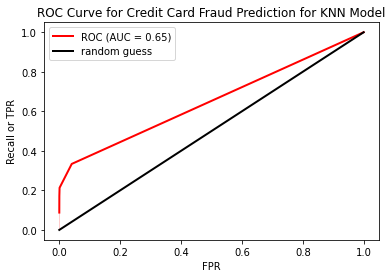

In [25]:
# probabilistic prediction
y_val_proba = KNN_model.predict_proba(X_val_ss)[:,1] 

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_val, y_val_proba)

# AUC
roc_auc = roc_auc_score(y_val, y_val_proba)

# plot
plt.figure()
sns.lineplot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
sns.lineplot([0, 1], [0, 1], color='black', lw=2, label='random guess') # random guess
plt.xlabel('FPR')
plt.ylabel('Recall or TPR')
plt.title('ROC Curve for Credit Card Fraud Prediction for KNN Model')
plt.legend(loc='best')
plt.show()

The AUC curve is only 65%. So far, the Decision Tree model is better at detecting fraudulent transactions than KNN.

## 3. Logistic Regression

In [26]:
# import the logistic regression model from sklearn

from sklearn.linear_model import LogisticRegression


# instantiate the model and fit it on the scaled data
LR_model = LogisticRegression(random_state=1).fit(X_train_ss, y_train)

# print out the train and validation accuracy scores
print(f"Train accuracy: {LR_model.score(X_train_ss, y_train)}")
print(f"Validation accuracy: {LR_model.score(X_val_ss, y_val)}")

Train accuracy: 0.9874805900621118
Validation accuracy: 0.9868016692006599


Again, the train and validation scores are really good, but like KNN it could be misleading.

So, I will go ahead and display the classification report for the model to see how well it performs at detecting fraudulent transactions.

In [27]:
# get the classification report
y_pred = LR_model.predict(X_val_ss)

report_initial = classification_report(y_val, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     30275
           1       0.82      0.46      0.59       638

    accuracy                           0.99     30913
   macro avg       0.90      0.73      0.79     30913
weighted avg       0.99      0.99      0.98     30913



So far, this model is better at correctly identifying fraudulent transactions then KNN but still not better than Decision Tree.

It was able to correctly identify only 46% of the fraudulent transactions. I will display the confusion matrix to see exactly how many non-fraudulent and fraudulent transactions were classified correctly and incorrectly.

In [28]:
display(y_val.value_counts())

# confusion matrix
con_matrix = pd.DataFrame(
    data = confusion_matrix(y_val, y_pred),
    index = ['True Non-fraudulent', 'True Fraudulent'],
    columns = ['Predicted Non-fraudulent', 'Predicted Fraudulent']
)
display(con_matrix)

0    30275
1      638
Name: is_fraud, dtype: int64

,Predicted Non-fraudulent,Predicted Fraudulent
True Non-fraudulent,30211,64
True Fraudulent,344,294


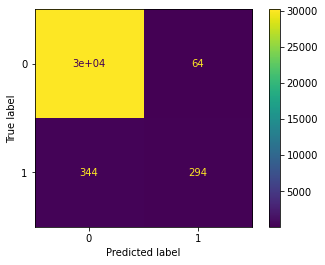

In [29]:
plot_confusion_matrix(LR_model, X_val_ss, y_val);

The model was able to accurately detect 294 fraudulent transactions out of 638. But it misclassified 344 fraudulent transactions as non-fraudulent.

The model was able to accurately detect 30,211 non-fraudulent transactions as non-fraudulent out of 30,275. But, it misclassified 64 non-fraudulent transactions as fraudulent.

Next, I will plot the ROC curve for the Logistic Regression model.

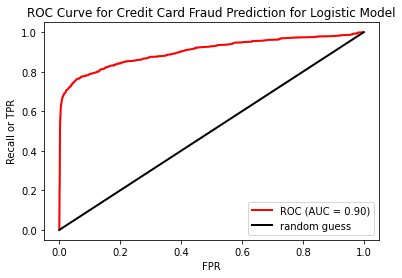

In [30]:
# probabilistic prediction
y_val_proba = LR_model.predict_proba(X_val_ss)[:,1] # probabilities of data points being in the positive class

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_val, y_val_proba)

# AUC
roc_auc = roc_auc_score(y_val, y_val_proba)

# plot
plt.figure()
sns.lineplot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
sns.lineplot([0, 1], [0, 1], color='black', lw=2, label='random guess') # random guess
plt.xlabel('FPR')
plt.ylabel('Recall or TPR')
plt.title('ROC Curve for Credit Card Fraud Prediction for Logistic Model')
plt.legend(loc='best')
plt.show()

The AUC curve is pretty good, at 90% which is deceptive as the model was only able to correctly detect 46% of the fraudulent transactions. 

So far, Decision Tree has been the best performing model so far. Next, I will be using ensemble models to see if I can get an even better model to detect fraudulent transactions.

# Ensemble Models

For the ensemble models, I will be using Random Forest and XGBoost. 

## Random Forest

In [31]:
# import the classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the model and fit the model to the scaled data
RF_model = RandomForestClassifier(random_state=1).fit(X_train_ss, y_train)


# print the train and validation scores
print(f"Number of Trees in the Forest: {RF_model.n_estimators}")
print(f"Train accuracy: {RF_model.score(X_train_ss, y_train)}")
print(f"Validation accuracy: {RF_model.score(X_val_ss, y_val)}")

Number of Trees in the Forest: 100
Train accuracy: 1.0
Validation accuracy: 0.9964416265001779


The train and validation accuracy are really good. Next, I will look at the classification report to see what the recall, F1 score and precision score look like.

In [32]:
y_pred = RF_model.predict(X_val_ss)

report_initial = classification_report(y_val, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30275
           1       0.99      0.83      0.91       638

    accuracy                           1.00     30913
   macro avg       0.99      0.92      0.95     30913
weighted avg       1.00      1.00      1.00     30913



This model is the best so far! With an 83% recall, 99% precision and 91% f1-score. The model was able to detect 83% of the fraudulent transactions. 

I will look at the classification report to see how many non-fraudulent and fraudulent transactions were classified correctly and incorrectly.

In [33]:
display(y_val.value_counts())

# confusion matrix
con_matrix = pd.DataFrame(
    data = confusion_matrix(y_val, y_pred),
    index = ['True Non-fraudulent', 'True Fraudulent'],
    columns = ['Predicted Non-fraudulent', 'Predicted Fraudulent']
)
display(con_matrix)

0    30275
1      638
Name: is_fraud, dtype: int64

,Predicted Non-fraudulent,Predicted Fraudulent
True Non-fraudulent,30271,4
True Fraudulent,106,532


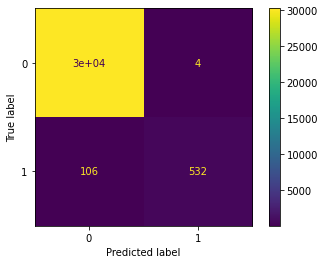

In [34]:
plot_confusion_matrix(RF_model, X_val_ss, y_val);

The model was able to classify 532 fraudulent transactions out of 638. But, it misclassified 4 non-fraudulent transactions as fraudulent.

The model was able to classify 30,271 non-fraudulent transactions as non-fraudulent, but misclassified 106 fraudulent transactions as non-fraudulent. Based on this information, Decision Tree still performs better than this model.

Next, I will plot the ROC curve.

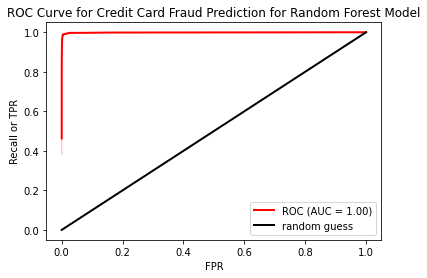

In [35]:
# probabilistic prediction
y_val_proba = RF_model.predict_proba(X_val_ss)[:,1] # probabilities of data points being in the positive class

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_val, y_val_proba)

# AUC
roc_auc = roc_auc_score(y_val, y_val_proba)

# plot
plt.figure()
sns.lineplot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
sns.lineplot([0, 1], [0, 1], color='black', lw=2, label='random guess') # random guess
plt.xlabel('FPR')
plt.ylabel('Recall or TPR')
plt.title('ROC Curve for Credit Card Fraud Prediction for Random Forest Model')
plt.legend(loc='best')
plt.show()

This is interesting, the AUC score for this model is 1.00, so 100%. But the Decision Tree model did better than this model according to the evaluation metric set to determine the better model, and it only had a 97% AUC score.

## XGBoost

In [36]:
# import the classifier

from xgboost import XGBClassifier

# instantiate and fit the model
XGB_model = XGBClassifier().fit(X_train, y_train)

# print the scores
print(f"Train accuracy: {XGB_model.score(X_train, y_train)}")
print(f"Validation accuracy: {XGB_model.score(X_val, y_val)}")

Train accuracy: 0.9987660825199645
Validation accuracy: 0.9984796040500761


In [37]:
# display the classification report
y_pred = XGB_model.predict(X_val)

report_initial = classification_report(y_val, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30275
           1       0.97      0.95      0.96       638

    accuracy                           1.00     30913
   macro avg       0.99      0.98      0.98     30913
weighted avg       1.00      1.00      1.00     30913



This is the best performing model yet (better than Decision Tree) with 95% recall, 96% f1-score, and 97% precision. Let's take a look at the confusion matrix to see how many transactions were classified correctly and incorrectly.

In [38]:
display(y_val.value_counts())

# confusion matrix
con_matrix = pd.DataFrame(
    data = confusion_matrix(y_val, y_pred),
    index = ['True Non-fraudulent', 'True Fraudulent'],
    columns = ['Predicted Non-fraudulent', 'Predicted Fraudulent']
)
display(con_matrix)

0    30275
1      638
Name: is_fraud, dtype: int64

,Predicted Non-fraudulent,Predicted Fraudulent
True Non-fraudulent,30259,16
True Fraudulent,31,607


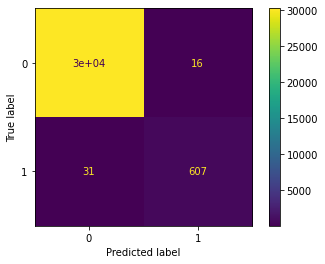

In [39]:
plot_confusion_matrix(XGB_model, X_val, y_val);

The model was able to accurately detect 607 fraudulent transactions out of 638, which is great! The model only misclassified 31 fraudulent transactions as non-fraudulent. The model also only misclassified 16 non-fraudulent transactions as fraudulent, and was able to correctly detect 30,259 non-fraudulent as non-fraudulent.

Let's take a look at the ROC curve.

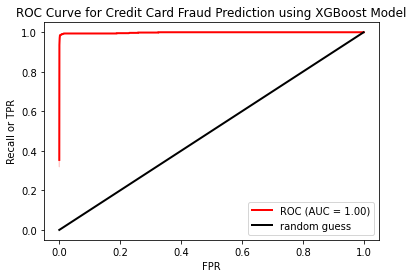

In [40]:
# probabilistic prediction
y_val_proba = XGB_model.predict_proba(X_val)[:,1] # probabilities of data points being in the positive class

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_val, y_val_proba)

# AUC
roc_auc = roc_auc_score(y_val, y_val_proba)

# plot
plt.figure()
sns.lineplot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
sns.lineplot([0, 1], [0, 1], color='black', lw=2, label='random guess') # random guess
plt.xlabel('FPR')
plt.ylabel('Recall or TPR')
plt.title('ROC Curve for Credit Card Fraud Prediction using XGBoost Model')
plt.legend(loc='best')
plt.show()

The ROC curve is really good, with the AUC curve of 100%. Based on the set evaluation metric of priority on detecting as many fraudulent transactions as possible, while having a good f1 score for the harmonic mean of recall and precision, this model, XGBoost performs better than the other models.

# Comparison of Base Models

Now that the base models have been completed with default parameters, I created the table below to compare the scores from each model.


Model                | Precision | Recall | F1 Score 
-------------------  |-----------|------- | ---------
Decision Tree        | 96%       | 95%    | 95%
KNN                  | 95%       | 17%    | 29%
Logistic Regression  | 82%       | 46%    | 59%
Random Forest        | 99%       | 83%    | 91%
XGBOOST              | 97%       | 95%    | 96%

So far, the XGBoost model performs better than the other models, having the highest recall and f1-score over the other models. It had the same recall score as Decision Tree, but had an overall better score on all three evaluation metrics.

# Neural Networks

Next thing I wanted to do was try out neural network on the model to see if it would outperform the other models.

In [41]:
# import the required modules

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [42]:
# Create a new sequential model
model = keras.Sequential()

#regularizer = keras.regularizers.l2(0.005)

# Declare the hidden layers
model.add(layers.Dense(200, input_shape=(X_train.shape[1],), activation="relu"))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(150, activation="relu"))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(50, activation="relu"))
model.add(layers.Dense(25, activation="relu"))
model.add(layers.Dense(5, activation="relu"))

# Declare the output layer
model.add(layers.Dense(1, activation="sigmoid"))


# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(),  
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()]
)

In [43]:
history = model.fit(X_train, y_train,epochs=100, verbose=0)

In [44]:
train_accuracy = history.history["binary_accuracy"][-1]
result = model.evaluate(X_val,y_val, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {result[1]:.4f}")

Train Accuracy: 0.9793
Test Accuracy: 0.9794


In [45]:
preds = np.round(model.predict(X_val),0)

print(confusion_matrix(y_val, preds))

[[30275     0]
 [  638     0]]


In [46]:
print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     30275
           1       0.00      0.00      0.00       638

    accuracy                           0.98     30913
   macro avg       0.49      0.50      0.49     30913
weighted avg       0.96      0.98      0.97     30913



After trying multiple models and regularizations, the neural network was not able to detect any fraudulent transactions. This might mean that the model is just not strong enough to detect the fraudulent transactions due to the class imbalance. So, I will move forward with the other models prior to building the neural network.

# Comparison of All Models

Model                | Precision | Recall | F1 Score 
-------------------  |-----------|------- | ---------
Decision Tree        | 96%       | 95%    | 95%
KNN                  | 95%       | 17%    | 29%
Logistic Regression  | 82%       | 46%    | 59%
Random Forest        | 99%       | 83%    | 91%
XGBOOST              | 97%       | 95%    | 96%
Neural Network       | 0%        | 0%     | 0%

Since I know that the XGBoost model is the best perfoming model, I will go ahead and try to optimize the model to get better results.

# Optimizing XGBoost for Better Results

---

My plan on optimizing XGBoost is to first correct the imbalance and see if the model will perform better. This includes downsampling and upsampling.

Based on the three XGBoost models (default parameters, correcting imbalance by downsampling and upsampling). I will choose the best performing model and optimize the parameters using GridSearchCV to get the best parameters.

## Downsampling

To downsample, I need to use resample from sklearn to get the distribution of class 0 to match the distribution of class 1, simply meaning that both class 0 and class 1 would have the same number of occurrences.

In [47]:
# import resampled
from sklearn.utils import resample

# print out original distribution to compare
print("Number of Class 0 Examples Before:", X_train[y_train==0].shape[0])

# resample the data to reduce the number of class 0 observations to match
# class 1 observations
X_downsampled, y_downsampled = resample(X_train[y_train==0],
                                        y_train[y_train==0],
                                        replace=True,
                                        n_samples=X_train[y_train==1].shape[0],
                                        random_state=1)

# print out new distribution
print("Number of Class 0 Examples After:", X_downsampled.shape[0])

# combine the downsampled data with the original data
X_down = np.vstack((X_train[y_train==1], X_downsampled))
y_down = np.hstack((y_train[y_train==1], y_downsampled))

Number of Class 0 Examples Before: 70638
Number of Class 0 Examples After: 1490


In [48]:
# check downsampled data

print('Original class distribution')
display(pd.Series(y_train).value_counts().sort_index())

print('\nResampled class distribution (Downsampled)')
display(pd.Series(y_down).value_counts().sort_index())

Original class distribution


0    70638
1     1490
Name: is_fraud, dtype: int64


Resampled class distribution (Downsampled)


0    1490
1    1490
dtype: int64

The resampled class distribution is now equally 1,490 for both class 0 and class 1. Now, I will use this new set to train and score the model (using default parameters, as this gave the best performing model).

In [49]:
# instantiate and fit the model
XGB_model_down = XGBClassifier().fit(X_down, y_down)

# print the scores
print(f"Train Accuracy: {XGB_model_down.score(X_down, y_down)}")
print(f"Validation Accuracy: {XGB_model_down.score(X_val.values, y_val)}")

Train Accuracy: 0.998993288590604
Validation Accuracy: 0.9930126484003494


In [50]:
# get the classificaiton report
y_pred_down = XGB_model_down.predict(X_val.values)

report_downsampled = classification_report(y_val, y_pred_down)
print(report_downsampled)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     30275
           1       0.75      0.99      0.85       638

    accuracy                           0.99     30913
   macro avg       0.87      0.99      0.93     30913
weighted avg       0.99      0.99      0.99     30913



In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f"Precision Score: {precision_score(y_val,y_pred_down)}")
print(f"Recall Score: {recall_score(y_val, y_pred_down)}")
print(f"F1 Score: {f1_score(y_val, y_pred_down)}")

Precision Score: 0.7494089834515366
Recall Score: 0.9937304075235109
F1 Score: 0.8544474393530996


In [52]:
display(y_val.value_counts())

# confusion matrix
con_matrix = pd.DataFrame(
    data = confusion_matrix(y_val, y_pred_down),
    index = ['True Non-fraudulent', 'True Fraudulent'],
    columns = ['Predicted Non-fraudulent', 'Predicted Fraudulent']
)
display(con_matrix)

0    30275
1      638
Name: is_fraud, dtype: int64

,Predicted Non-fraudulent,Predicted Fraudulent
True Non-fraudulent,30063,212
True Fraudulent,4,634


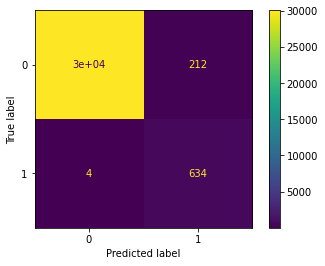

In [53]:
plot_confusion_matrix(XGB_model_down, X_val.values, y_val);

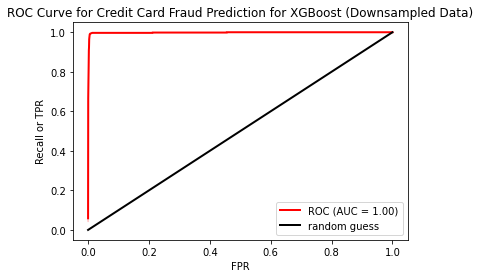

In [54]:
# probabilistic prediction
y_val_proba = XGB_model_down.predict_proba(X_val.values)[:,1] # probabilities of data points being in the positive class

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_val, y_val_proba)

# AUC
roc_auc = roc_auc_score(y_val, y_val_proba)

# plot
plt.figure()
sns.lineplot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
sns.lineplot([0, 1], [0, 1], color='black', lw=2, label='random guess') # random guess
plt.xlabel('FPR')
plt.ylabel('Recall or TPR')
plt.title('ROC Curve for Credit Card Fraud Prediction for XGBoost (Downsampled Data)')
plt.legend(loc='best')
plt.show()

This downsampled model definitely was able to correctly detect 99% of fraudulent transactions, but it misclassified 212 non-fraudulent transactions as fraudulent. So, the precision score is lower than the best performing model from earlier. The f1-score also reduced due to the lower score of precision.

I will correct the imbalanced data using upsampling to see if I get better results.

## Upsampling

In [55]:
# Similar to downsampling, I increased the class 1 distribution
# to match the number of observations for class 0


# print the original class 1 distribution
print('Number of Class 1 Examples Before:', X_train[y_train==1].shape[0])


# resample the data to upsample the class 1 distribution
X_upsampled, y_upsampled = resample(X_train[y_train==1],
                                    y_train[y_train==1],
                                    replace=True,
                                    n_samples=X_train[y_train==0].shape[0],
                                    random_state=1)

# print out the new class 1 distribution
print('Number of Class 1 Examples After:', X_upsampled.shape[0])

# combine the upsampled data with the original data
X_up = np.vstack((X_train[y_train==0], X_upsampled))
y_up = np.hstack((y_train[y_train==0], y_upsampled))

Number of Class 1 Examples Before: 1490
Number of Class 1 Examples After: 70638


In [56]:
# check upsampled data

print('Original class distribution')
display(pd.Series(y_train).value_counts().sort_index())

print('\nResampled class distribution (Upsampled)')
display(pd.Series(y_up).value_counts().sort_index())

Original class distribution


0    70638
1     1490
Name: is_fraud, dtype: int64


Resampled class distribution (Upsampled)


0    70638
1    70638
dtype: int64

The new class 1 distribution now matches the original class 0 distribution. Both classes now have equally 70,638 observations.

In [57]:
# instantiate and fit the model on the upsampled data
XGB_model_up = XGBClassifier().fit(X_up, y_up)

# print scores
print(f"Train Accuracy: {XGB_model_up.score(X_up, y_up)}")
print(f"Validation Accuracy: {XGB_model_up.score(X_val.values, y_val)}")

Train Accuracy: 0.9979755938729862
Validation Accuracy: 0.9961504868501925


In [58]:
# display the classification report

y_pred_up = XGB_model_up.predict(X_val.values)

report_upsampled = classification_report(y_val, y_pred_up)
print(report_upsampled)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30275
           1       0.85      0.99      0.91       638

    accuracy                           1.00     30913
   macro avg       0.93      0.99      0.96     30913
weighted avg       1.00      1.00      1.00     30913



In [59]:
print(f"Precision Score: {precision_score(y_val,y_pred_up)}")
print(f"Recall Score: {recall_score(y_val, y_pred_up)}")
print(f"F1 Score: {f1_score(y_val, y_pred_up)}")

Precision Score: 0.851150202976996
Recall Score: 0.9858934169278997
F1 Score: 0.9135802469135802


In [60]:
display(y_val.value_counts())

# confusion matrix
con_matrix = pd.DataFrame(
    data = confusion_matrix(y_val, y_pred_up),
    index = ['True Non-fraudulent', 'True Fraudulent'],
    columns = ['Predicted Non-fraudulent', 'Predicted Fraudulent']
)
display(con_matrix)

0    30275
1      638
Name: is_fraud, dtype: int64

,Predicted Non-fraudulent,Predicted Fraudulent
True Non-fraudulent,30165,110
True Fraudulent,9,629


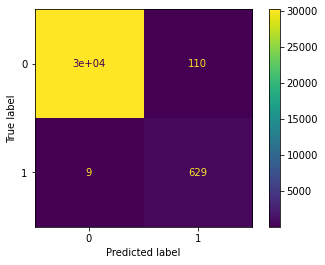

In [61]:
plot_confusion_matrix(XGB_model_up, X_val.values, y_val);

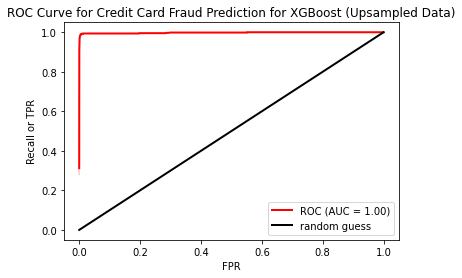

In [62]:
# probabilistic prediction
y_val_proba = XGB_model_up.predict_proba(X_val.values)[:,1] # probabilities of data points being in the positive class

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_val, y_val_proba)

# AUC
roc_auc = roc_auc_score(y_val, y_val_proba)

# plot
plt.figure()
sns.lineplot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
sns.lineplot([0, 1], [0, 1], color='black', lw=2, label='random guess') # random guess
plt.xlabel('FPR')
plt.ylabel('Recall or TPR')
plt.title('ROC Curve for Credit Card Fraud Prediction for XGBoost (Upsampled Data)')
plt.legend(loc='best')
plt.show()

The upsampled model did a better job at detecting fraudulent transactions than the downsampled model. The upsampled model was able to detect 99% of the fraudulent transactions like the downsampled model, but the upsampled model had a higher f1-score of 91% and a higher precision score of 85%.

# Comparison of XGBoost Models

These are the three models done for XGBoost. Out of the three, the upsampled XGBoost model performs the best.


Model           | Precision | Recall | F1 Score 
----------------|-----------|------- | ---------
Original        | 97%       | 95%    | 96%
Upsampled       | 85%       | 99%    | 91%
Downsampled     | 75%       | 99%    | 85%

Going forward, I will optimize the parameters of the upsampled XGBoost model using GridSearch to see if I can have an even better performing model.

## Optimizing the Parameters of the Best Performing XGBoost Model


The evaluation metric I am using is prioritizing recall, being able to detect as many fraudulent transactions as possible, without trading too much of precision - so making the F1 score (the harmonic mean of both) a second priority.

In this case, both Upsampled Model and Downsampled Model have 99% recall, which is great! But, Downsampled model has 75% precision and 85% F1 score, while upsampled model has 85% precision and 91% F1 Score. Based on the evaluation metric I set, the Upsampled model is the best performing model.

The next step, is to see if I can optimize the model even further, perhaps maintaining the recall score but finding ways to increase the precision and F1 score.

In [63]:
# Start by importing required libraries

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [64]:
# define the estimators and pipe for the pipeline
estimators = [("normalise", None),
              ("model", XGBClassifier())]

pipe = Pipeline(estimators)

The next step was to define the parameter grid, instantiate GridSearchCV and fit the upsampled model.

**Note that this block of code will take 8 hours to run if you decide to run it**

In [65]:
# define the parameter grid with other parameters to see which one
# is the best

param_grid = [
    {'normalise': [None],
     'model__eta': [0.1, 0.3],
     'model__gamma': [0, 2],
     'model__max_depth': [6, 8],
     'model__min_child_weight': [1, 3]}]

grid = GridSearchCV(pipe, param_grid, cv=5)

fitted_grid = grid.fit(X_up, y_up)

The best parameters were then printed out:

In [66]:
# The best hyperparameters
fitted_grid.best_params_

{'model__eta': 0.1,
 'model__gamma': 0,
 'model__max_depth': 8,
 'model__min_child_weight': 1,
 'normalise': None}

The best parameters were then used in the model to see how well it performs.

In [67]:
# fit the model with the best parameters from GridSearchCV
XGB_model_best_params = XGBClassifier(eta=0.1, gamma=0, 
                                      max_depth=8, min_child_weight=1).fit(X_up, y_up)

# print out the scores
print(f"Train accuracy: {XGB_model_best_params.score(X_up, y_up)}")
print(f"Validation accuracy: {XGB_model_best_params.score(X_val.values, y_val)}")

Train accuracy: 0.9999009031965798
Validation accuracy: 0.9984472552000776


In [68]:
# display the classification report
y_pred = XGB_model_best_params.predict(X_val.values)

report_XGB = classification_report(y_val, y_pred)
print(report_XGB)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30275
           1       0.95      0.98      0.96       638

    accuracy                           1.00     30913
   macro avg       0.97      0.99      0.98     30913
weighted avg       1.00      1.00      1.00     30913



In [69]:
display(y_val.value_counts())

# confusion matrix
con_matrix = pd.DataFrame(
    data = confusion_matrix(y_val, y_pred),
    index = ['True Non-fraudulent', 'True Fraudulent'],
    columns = ['Predicted Non-fraudulent', 'Predicted Fraudulent']
)
display(con_matrix)

0    30275
1      638
Name: is_fraud, dtype: int64

,Predicted Non-fraudulent,Predicted Fraudulent
True Non-fraudulent,30241,34
True Fraudulent,14,624


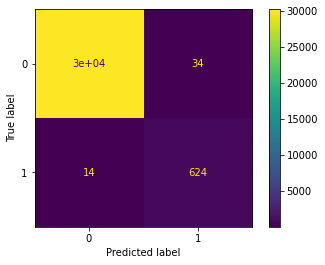

In [70]:
plot_confusion_matrix(XGB_model_best_params, X_val.values, y_val);

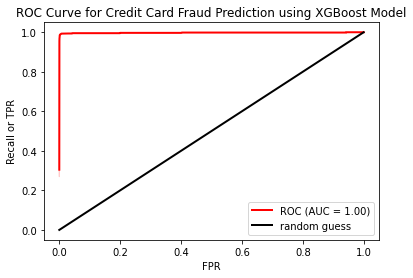

In [71]:
# probabilistic prediction
y_val_proba = XGB_model_best_params.predict_proba(X_val.values)[:,1] # probabilities of data points being in the positive class

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_val, y_val_proba)

# AUC
roc_auc = roc_auc_score(y_val, y_val_proba)

# plot
plt.figure()
sns.lineplot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
sns.lineplot([0, 1], [0, 1], color='black', lw=2, label='random guess') # random guess
plt.xlabel('FPR')
plt.ylabel('Recall or TPR')
plt.title('ROC Curve for Credit Card Fraud Prediction using XGBoost Model')
plt.legend(loc='best')
plt.show()

This is great! The model has a great recall score of 98%, with an f1-score of 96%, and precision of 95%. It was able to detect 624 fraudulent cases out of 638, only misclassifying 14 fraudulent cases as fraudulent. It was also able to detect 30,241 non-fraudulent cases out of 30,275 non-fraudulent cases, only misclassifying 34 non-fraudulent cases as fraudulent.

The best performing model can now be confirmed as the Upsampled XGBoost Model with optimized parameters.

# Final Models - Scoring on Test Set for Comparison
---

Since the final model has been completed and the best performing model has been chosen, I will now go through the models done and test it on the test set (never before seen data) to really see how well my model performed on data it has never seen before.

## KNN

In [72]:
# Scale the data
scaler = StandardScaler().fit(X_train)

# Transform the sets
X_train_ss = scaler.transform(X_train)
X_val_ss = scaler.transform(X_val)
X_test_ss = scaler.transform(X_test)

# Fit the model
KNN_model = KNeighborsClassifier().fit(X_train_ss, y_train)


# Score the sets
print(f"Train accuracy: {KNN_model.score(X_train_ss, y_train)}")
print(f"Validation accuracy: {KNN_model.score(X_val_ss, y_val)}")
print(f"Test accuracy: {KNN_model.score(X_test_ss, y_test)}")

Train accuracy: 0.9835292812777284
Validation accuracy: 0.9826933652508654
Test accuracy: 0.9825317340165366


In [73]:
y_pred = KNN_model.predict(X_test_ss)

report_KNN = classification_report(y_test, y_pred)
print(report_KNN)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     25229
           1       0.94      0.17      0.28       532

    accuracy                           0.98     25761
   macro avg       0.96      0.58      0.64     25761
weighted avg       0.98      0.98      0.98     25761



In [74]:
display(y_test.value_counts())

# confusion matrix
con_matrix_KNN = pd.DataFrame(
    data = confusion_matrix(y_test, y_pred),
    index = ['True Non-fraudulent', 'True Fraudulent'],
    columns = ['Predicted Non-fraudulent', 'Predicted Fraudulent']
)
display(con_matrix_KNN)

0    25229
1      532
Name: is_fraud, dtype: int64

,Predicted Non-fraudulent,Predicted Fraudulent
True Non-fraudulent,25223,6
True Fraudulent,444,88


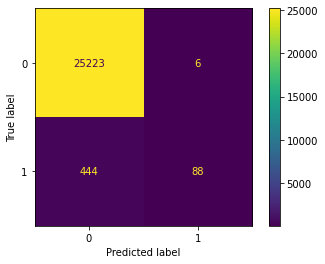

In [75]:
plot_confusion_matrix(KNN_model, X_test_ss, y_test);

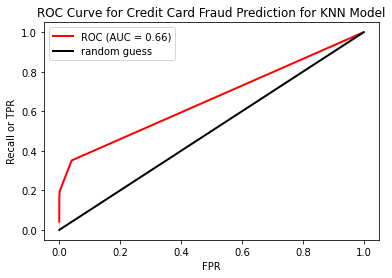

In [76]:
# probabilistic prediction
y_test_proba_KNN = KNN_model.predict_proba(X_test_ss)[:,1] # probabilities of data points being in the positive class

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_test, y_test_proba_KNN)

# AUC
roc_auc = roc_auc_score(y_test, y_test_proba_KNN)

# plot
plt.figure()
sns.lineplot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
sns.lineplot([0, 1], [0, 1], color='black', lw=2, label='random guess') # random guess
plt.xlabel('FPR')
plt.ylabel('Recall or TPR')
plt.title('ROC Curve for Credit Card Fraud Prediction for KNN Model')
plt.legend(loc='best')
plt.show()

## Decision Tree

In [77]:
# instantiate and fit the model on the train set
DT_model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)

# score the train and validation set
print(f"Train accuracy: {DT_model.score(X_train, y_train)}")
print(f"Validation accuracy: {DT_model.score(X_val, y_val)}")
print(f"Test accuracy: {DT_model.score(X_test, y_test)}")

Train accuracy: 1.0
Validation accuracy: 0.998059069000097
Test accuracy: 0.9979814448196886


In [78]:
y_pred_DT = DT_model.predict(X_test)

report_DT = classification_report(y_test, y_pred_DT)
print(report_DT)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25229
           1       0.95      0.95      0.95       532

    accuracy                           1.00     25761
   macro avg       0.97      0.98      0.98     25761
weighted avg       1.00      1.00      1.00     25761



In [79]:
# display the class distribution to see the totals for each class
display(y_test.value_counts())

# display confusion matrix
con_matrix_DT = pd.DataFrame(
    data = confusion_matrix(y_test, y_pred_DT),
    index = ['True Non-fraudulent', 'True Fraudulent'],
    columns = ['Predicted Non-fraudulent', 'Predicted Fraudulent']
)
display(con_matrix_DT)

0    25229
1      532
Name: is_fraud, dtype: int64

,Predicted Non-fraudulent,Predicted Fraudulent
True Non-fraudulent,25202,27
True Fraudulent,25,507


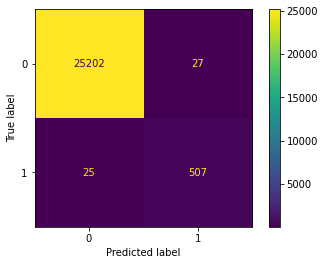

In [80]:
plot_confusion_matrix(DT_model, X_test, y_test);

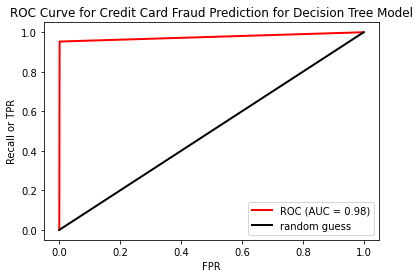

In [81]:
# probabilistic prediction
y_test_proba_DT = DT_model.predict_proba(X_test)[:,1] # probabilities of data points being in the positive class

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_test, y_test_proba_DT)

# AUC
roc_auc = roc_auc_score(y_test, y_test_proba_DT)

# plot
plt.figure()
sns.lineplot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
sns.lineplot([0, 1], [0, 1], color='black', lw=2, label='random guess') # random guess
plt.xlabel('FPR')
plt.ylabel('Recall or TPR')
plt.title('ROC Curve for Credit Card Fraud Prediction for Decision Tree Model')
plt.legend(loc='best')
plt.show()

## Logistic Regression

In [82]:
LR_model = LogisticRegression(random_state=1).fit(X_train_ss, y_train)

print(f"Train accuracy: {LR_model.score(X_train_ss, y_train)}")
print(f"Validation accuracy: {LR_model.score(X_val_ss, y_val)}")
print(f"Test accuracy: {LR_model.score(X_test_ss, y_test)}")

Train accuracy: 0.9874805900621118
Validation accuracy: 0.9868016692006599
Test accuracy: 0.9855207484181515


In [83]:
y_pred_LR = LR_model.predict(X_test_ss)

report_LR = classification_report(y_test, y_pred_LR)
print(report_LR)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     25229
           1       0.77      0.43      0.55       532

    accuracy                           0.99     25761
   macro avg       0.88      0.71      0.77     25761
weighted avg       0.98      0.99      0.98     25761



In [84]:
display(y_test.value_counts())

# confusion matrix
con_matrix_LR = pd.DataFrame(
    data = confusion_matrix(y_test, y_pred_LR),
    index = ['True Non-fraudulent', 'True Fraudulent'],
    columns = ['Predicted Non-fraudulent', 'Predicted Fraudulent']
)
display(con_matrix_LR)

0    25229
1      532
Name: is_fraud, dtype: int64

,Predicted Non-fraudulent,Predicted Fraudulent
True Non-fraudulent,25159,70
True Fraudulent,303,229


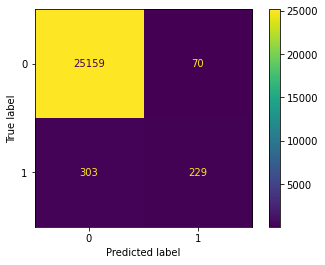

In [85]:
plot_confusion_matrix(LR_model, X_test_ss, y_test);

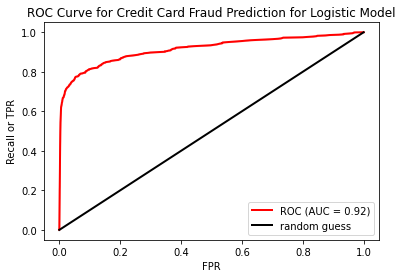

In [86]:
# probabilistic prediction
y_test_proba_LR = LR_model.predict_proba(X_test_ss)[:,1] # probabilities of data points being in the positive class

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_test, y_test_proba_LR)

# AUC
roc_auc = roc_auc_score(y_test, y_test_proba_LR)

# plot
plt.figure()
sns.lineplot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
sns.lineplot([0, 1], [0, 1], color='black', lw=2, label='random guess') # random guess
plt.xlabel('FPR')
plt.ylabel('Recall or TPR')
plt.title('ROC Curve for Credit Card Fraud Prediction for Logistic Model')
plt.legend(loc='best')
plt.show()

## Random Forest

In [87]:
RF_model = RandomForestClassifier(random_state=1).fit(X_train_ss, y_train)

print(f"Number of Trees in the Forest: {RF_model.n_estimators}")
print(f"Train accuracy: {RF_model.score(X_train_ss, y_train)}")
print(f"Validation accuracy: {RF_model.score(X_val_ss, y_val)}")
print(f"Test accuracy: {RF_model.score(X_test_ss, y_test)}")

Number of Trees in the Forest: 100
Train accuracy: 1.0
Validation accuracy: 0.9964416265001779
Test accuracy: 0.995846434532821


In [88]:
y_pred_RF = RF_model.predict(X_test_ss)

report_RF = classification_report(y_test, y_pred_RF)
print(report_RF)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25229
           1       0.99      0.81      0.89       532

    accuracy                           1.00     25761
   macro avg       0.99      0.90      0.94     25761
weighted avg       1.00      1.00      1.00     25761



In [89]:
display(y_test.value_counts())

# confusion matrix
con_matrix_RF = pd.DataFrame(
    data = confusion_matrix(y_test, y_pred_RF),
    index = ['True Non-fraudulent', 'True Fraudulent'],
    columns = ['Predicted Non-fraudulent', 'Predicted Fraudulent']
)
display(con_matrix_RF)

0    25229
1      532
Name: is_fraud, dtype: int64

,Predicted Non-fraudulent,Predicted Fraudulent
True Non-fraudulent,25225,4
True Fraudulent,103,429


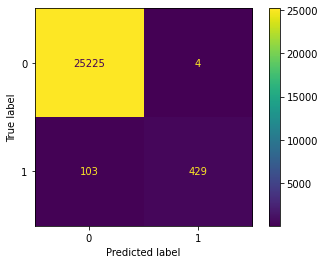

In [90]:
plot_confusion_matrix(RF_model, X_test_ss, y_test);

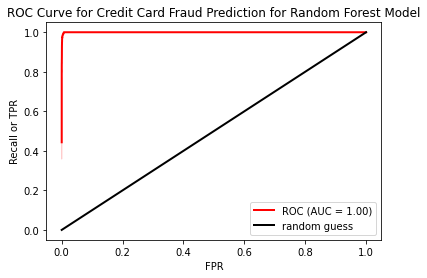

In [91]:
# probabilistic prediction
y_test_proba_RF = RF_model.predict_proba(X_test_ss)[:,1] # probabilities of data points being in the positive class

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_test, y_test_proba_RF)

# AUC
roc_auc = roc_auc_score(y_test, y_test_proba_RF)

# plot
plt.figure()
sns.lineplot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
sns.lineplot([0, 1], [0, 1], color='black', lw=2, label='random guess') # random guess
plt.xlabel('FPR')
plt.ylabel('Recall or TPR')
plt.title('ROC Curve for Credit Card Fraud Prediction for Random Forest Model')
plt.legend(loc='best')
plt.show()

## XGBoost

### Original Class Distribution

In [92]:
XGB_model = XGBClassifier().fit(X_train, y_train)

print(f"Train accuracy: {XGB_model.score(X_train, y_train)}")
print(f"Validation accuracy: {XGB_model.score(X_val, y_val)}")
print(f"Test accuracy: {XGB_model.score(X_test, y_test)}")

Train accuracy: 0.9987660825199645
Validation accuracy: 0.9984796040500761
Test accuracy: 0.9982919917705058


In [93]:
y_pred_XGB = XGB_model.predict(X_test)

report_XGB = classification_report(y_test, y_pred_XGB)
print(report_XGB)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25229
           1       0.96      0.96      0.96       532

    accuracy                           1.00     25761
   macro avg       0.98      0.98      0.98     25761
weighted avg       1.00      1.00      1.00     25761



In [94]:
display(y_test.value_counts())

# confusion matrix
con_matrix_XGB = pd.DataFrame(
    data = confusion_matrix(y_test, y_pred_XGB),
    index = ['True Non-fraudulent', 'True Fraudulent'],
    columns = ['Predicted Non-fraudulent', 'Predicted Fraudulent']
)
display(con_matrix_XGB)

0    25229
1      532
Name: is_fraud, dtype: int64

,Predicted Non-fraudulent,Predicted Fraudulent
True Non-fraudulent,25208,21
True Fraudulent,23,509


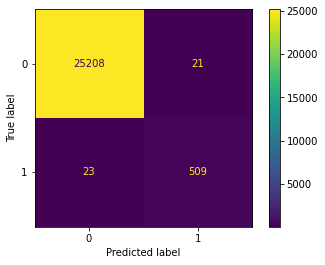

In [95]:
plot_confusion_matrix(XGB_model, X_test, y_test);

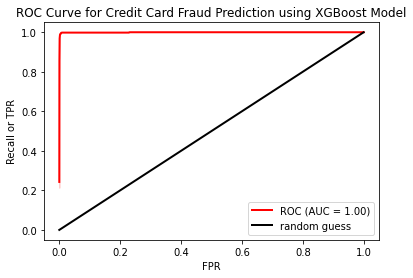

In [96]:
# probabilistic prediction
y_test_proba_XGB = XGB_model.predict_proba(X_test)[:,1] # probabilities of data points being in the positive class

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_test, y_test_proba_XGB)

# AUC
roc_auc = roc_auc_score(y_test, y_test_proba_XGB)

# plot
plt.figure()
sns.lineplot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
sns.lineplot([0, 1], [0, 1], color='black', lw=2, label='random guess') # random guess
plt.xlabel('FPR')
plt.ylabel('Recall or TPR')
plt.title('ROC Curve for Credit Card Fraud Prediction using XGBoost Model')
plt.legend(loc='best')
plt.show()

### Downsampled Data

In [97]:
print('Original class distribution')
display(pd.Series(y_train).value_counts().sort_index())

print('\nResampled class distribution (Downsampled)')
display(pd.Series(y_down).value_counts().sort_index())

Original class distribution


0    70638
1     1490
Name: is_fraud, dtype: int64


Resampled class distribution (Downsampled)


0    1490
1    1490
dtype: int64

In [98]:
XGB_model_down = XGBClassifier().fit(X_down, y_down)

print(f"Train Accuracy: {XGB_model_down.score(X_down, y_down)}")
print(f"Validation Accuracy: {XGB_model_down.score(X_val.values, y_val)}")
print(f"Test Accuracy: {XGB_model_down.score(X_test.values, y_test)}")

Train Accuracy: 0.998993288590604
Validation Accuracy: 0.9930126484003494
Test Accuracy: 0.9915764139590855


In [99]:
y_pred_down = XGB_model_down.predict(X_test.values)

report_downsampled = classification_report(y_test, y_pred_down)
print(report_downsampled)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     25229
           1       0.71      1.00      0.83       532

    accuracy                           0.99     25761
   macro avg       0.86      0.99      0.91     25761
weighted avg       0.99      0.99      0.99     25761



In [100]:
display(y_val.value_counts())

# confusion matrix
con_matrix = pd.DataFrame(
    data = confusion_matrix(y_test, y_pred_down),
    index = ['True Non-fraudulent', 'True Fraudulent'],
    columns = ['Predicted Non-fraudulent', 'Predicted Fraudulent']
)
display(con_matrix)

0    30275
1      638
Name: is_fraud, dtype: int64

,Predicted Non-fraudulent,Predicted Fraudulent
True Non-fraudulent,25013,216
True Fraudulent,1,531


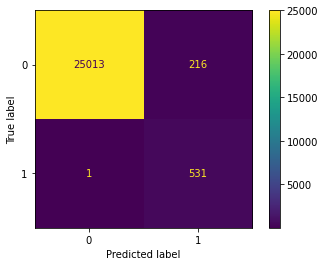

In [101]:
plot_confusion_matrix(XGB_model_down, X_test.values, y_test);

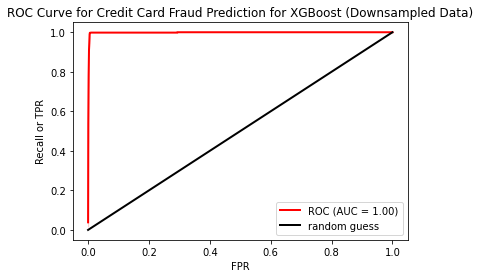

In [102]:
# probabilistic prediction
y_test_proba = XGB_model_down.predict_proba(X_test.values)[:,1] # probabilities of data points being in the positive class

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_test, y_test_proba)

# AUC
roc_auc = roc_auc_score(y_test, y_test_proba)

# plot
plt.figure()
sns.lineplot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
sns.lineplot([0, 1], [0, 1], color='black', lw=2, label='random guess') # random guess
plt.xlabel('FPR')
plt.ylabel('Recall or TPR')
plt.title('ROC Curve for Credit Card Fraud Prediction for XGBoost (Downsampled Data)')
plt.legend(loc='best')
plt.show()

### Upsampled Data (Original)

In [103]:
print('Original class distribution')
display(pd.Series(y_train).value_counts().sort_index())

print('\nResampled class distribution (Upsampled)')
display(pd.Series(y_up).value_counts().sort_index())

Original class distribution


0    70638
1     1490
Name: is_fraud, dtype: int64


Resampled class distribution (Upsampled)


0    70638
1    70638
dtype: int64

In [104]:
XGB_model_up = XGBClassifier().fit(X_up, y_up)

print(f"Train Accuracy: {XGB_model_up.score(X_up, y_up)}")
print(f"Validation Accuracy: {XGB_model_up.score(X_val.values, y_val)}")
print(f"Test Accuracy: {XGB_model_up.score(X_test.values, y_test)}")

Train Accuracy: 0.9979755938729862
Validation Accuracy: 0.9961504868501925
Test Accuracy: 0.9956523426885602


In [105]:
y_pred_up = XGB_model_up.predict(X_test.values)

report_upsampled = classification_report(y_test, y_pred_up)
print(report_upsampled)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25229
           1       0.83      0.99      0.90       532

    accuracy                           1.00     25761
   macro avg       0.92      0.99      0.95     25761
weighted avg       1.00      1.00      1.00     25761



In [106]:
display(y_test.value_counts())

# confusion matrix
con_matrix = pd.DataFrame(
    data = confusion_matrix(y_test, y_pred_up),
    index = ['True Non-fraudulent', 'True Fraudulent'],
    columns = ['Predicted Non-fraudulent', 'Predicted Fraudulent']
)
display(con_matrix)

0    25229
1      532
Name: is_fraud, dtype: int64

,Predicted Non-fraudulent,Predicted Fraudulent
True Non-fraudulent,25121,108
True Fraudulent,4,528


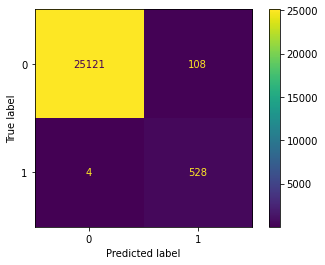

In [107]:
plot_confusion_matrix(XGB_model_up, X_test.values, y_test);

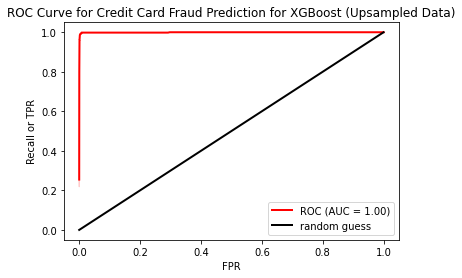

In [108]:
# probabilistic prediction
y_test_proba = XGB_model_up.predict_proba(X_test.values)[:,1] # probabilities of data points being in the positive class

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_test, y_test_proba)

# AUC
roc_auc = roc_auc_score(y_test, y_test_proba)

# plot
plt.figure()
sns.lineplot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
sns.lineplot([0, 1], [0, 1], color='black', lw=2, label='random guess') # random guess
plt.xlabel('FPR')
plt.ylabel('Recall or TPR')
plt.title('ROC Curve for Credit Card Fraud Prediction for XGBoost (Upsampled Data)')
plt.legend(loc='best')
plt.show()

### Optimized Parameters for XGBoost

In [109]:
XGB_model_best_params = XGBClassifier(eta=0.1, gamma=0, 
                                      max_depth=8, min_child_weight=1).fit(X_up, y_up)

print(f"Train accuracy: {XGB_model_best_params.score(X_up, y_up)}")
print(f"Validation accuracy: {XGB_model_best_params.score(X_val.values, y_val)}")
print(f"Test accuracy: {XGB_model_best_params.score(X_test.values, y_test)}")

Train accuracy: 0.9999009031965798
Validation accuracy: 0.9984472552000776
Test accuracy: 0.9985249019836187


In [110]:
y_pred = XGB_model_best_params.predict(X_test.values)

report_XGB_best = classification_report(y_test, y_pred)
print(report_XGB_best)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25229
           1       0.94      0.99      0.97       532

    accuracy                           1.00     25761
   macro avg       0.97      0.99      0.98     25761
weighted avg       1.00      1.00      1.00     25761



In [111]:
display(y_test.value_counts())

# confusion matrix
con_matrix = pd.DataFrame(
    data = confusion_matrix(y_test, y_pred),
    index = ['True Non-fraudulent', 'True Fraudulent'],
    columns = ['Predicted Non-fraudulent', 'Predicted Fraudulent']
)
display(con_matrix)

0    25229
1      532
Name: is_fraud, dtype: int64

,Predicted Non-fraudulent,Predicted Fraudulent
True Non-fraudulent,25196,33
True Fraudulent,5,527


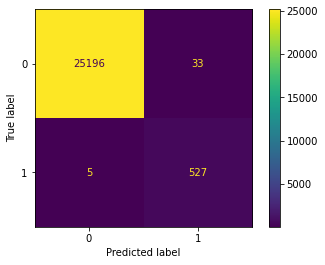

In [112]:
plot_confusion_matrix(XGB_model_best_params, X_test.values, y_test);

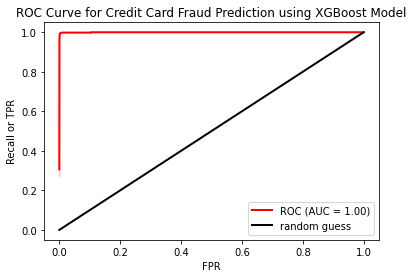

In [113]:
# probabilistic prediction
y_test_proba = XGB_model_best_params.predict_proba(X_test.values)[:,1] # probabilities of data points being in the positive class

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_test, y_test_proba)

# AUC
roc_auc = roc_auc_score(y_test, y_test_proba)

# plot
plt.figure()
sns.lineplot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
sns.lineplot([0, 1], [0, 1], color='black', lw=2, label='random guess') # random guess
plt.xlabel('FPR')
plt.ylabel('Recall or TPR')
plt.title('ROC Curve for Credit Card Fraud Prediction using XGBoost Model')
plt.legend(loc='best')
plt.show()

# Comparison of Models on Test Set VS Models on Validation Set


**Original Base Models on Validation Set**

Model                | Precision | Recall | F1 Score 
-------------------  |-----------|------- | ---------
Decision Tree        | 96%       | 95%    | 95%
KNN                  | 95%       | 17%    | 29%
Logistic Regression  | 82%       | 46%    | 59%
Random Forest        | 99%       | 83%    | 91%
XGBOOST              | 97%       | 95%    | 96%
Neural Network       | 0%        | 0%     | 0%


**XGBoost Models on Validation Set**

Model           | Precision | Recall | F1 Score 
----------------|-----------|------- | ---------
Original        | 97%       | 95%    | 96%
Upsampled       | 85%       | 99%    | 91%
Downsampled     | 75%       | 99%    | 85%


**All Models on Test Set**

Model                | Precision | Recall | F1 Score 
-------------------  |-----------|------- | ---------
Decision Tree        | 95%       | 95%    | 95%
KNN                  | 94%       | 17%    | 28%
Logistic Regression  | 77%       | 43%    | 65%
Random Forest        | 99%       | 81%    | 89%
XGBoost (Original)   | 96%       | 96%    | 96%
XGBoost (Downsampled)| 71%       | 100%   | 83%
XGBoost (Upsampled)  | 83%       | 99%    | 90%
XGBoost (Optimized)  | 94%       | 99%    | 97%

---

# Summary

In this notebook, I conducted different models on the dataset to determine which model is the best performing with regards to correctly detecting fraudulent transactions without trading precision.

Depending on the financial institution, there might be more emphasis on being able to detect 100% of the fraudulent transactions, despite misclassifying non-fraudulent transactions.

In this case, the evaluation metric I chose to use was to be able to identify as many fraudulent cases as possible without having a low f1-score or precision score. With the optimized XGBoost model, it was able to detect 99% of the fraudulent cases with an impressive 94% precision score as well.

The next step would be to deploy the best performing model to be used in real-life cases.

**Practical Applications:**

This model can be used in financial institutions, FinTech companies, and credit card companies to detect credit card fraudulent transactions.

**Potential Future Direction:**

Some Potential future direction for my project would be being able to predict customers with increased likelihood of being defrauded - based on their financial state (i.e. the customer's amount of debt)

Another is to further develop the model not just on credit card transactions, but on other types of transactions/payment or even much further in spam detection.